# Data Analysis: Wisconsin Diagnostic Breast Cancer 

Final Project - 02

1. Download the data and import it successfully to a pandas DataFrame 
2. Create a histogram of the size and the shape of Unif-Cell 
3. Create a Joint plot using Seaborn 
4. Investigate and invalid or missing (NaN) data and deal with it 
5. Split the data into train and test sets 
6. Create a Logistic Regression classifier and train it using your Training data set. 
7. Make predictions using test data and generate confusion matrix of your results. 
8. Generate the confusion matrix and compare the accuracy with the result of previous step.


# 1. Download the data and import it to a pandas DataFrame

In [1]:
import numpy as np 
import pandas as pd

In [2]:
data = pd.read_csv('Wisconsin_Diagnostic_Breast_Cancer.csv')
data.head()

,ID,Clum_thick,Unif_cell_size,Unif_cell_shape,Marg_adhesion,single_epich,Bare_nuc,Bland_chrom,Norm_nucl,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [3]:
data.shape

(699, 11)

In [4]:
data.dtypes

ID                  int64
Clum_thick          int64
Unif_cell_size      int64
Unif_cell_shape     int64
Marg_adhesion       int64
single_epich        int64
Bare_nuc           object
Bland_chrom         int64
Norm_nucl           int64
Mitoses             int64
Class               int64
dtype: object

In [5]:
type(data)

pandas.core.frame.DataFrame

# 2. Create a histogram of the size and the shape of Unif-Cell

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # set plot style

In [7]:
#convert dataframe to an array 
size = np.array(data['Unif_cell_size'])
shape = np.array(data['Unif_cell_shape'])

In [8]:
type(size)

numpy.ndarray

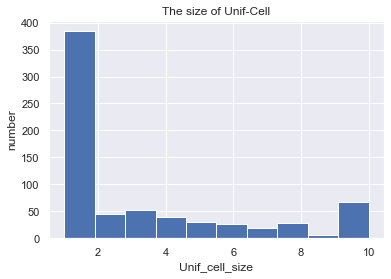

In [9]:
plt.hist(size)
plt.title('The size of Unif-Cell')
plt.xlabel('Unif_cell_size')
plt.ylabel('number');

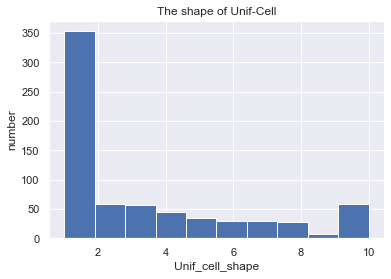

In [10]:
plt.hist(shape)
plt.title('The shape of Unif-Cell')
plt.xlabel('Unif_cell_shape')
plt.ylabel('number');

# 3. Create a Joint plot using Seaborn

In [11]:
import seaborn as sns


In [12]:
sns.__version__

'0.11.2'

In [13]:
data.head()

,ID,Clum_thick,Unif_cell_size,Unif_cell_shape,Marg_adhesion,single_epich,Bare_nuc,Bland_chrom,Norm_nucl,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [14]:
sns.set_style('darkgrid')

In [15]:
plt.show()

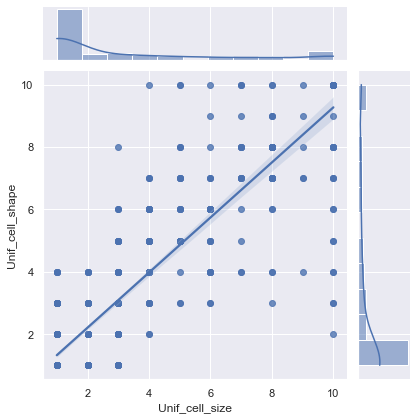

In [16]:
#sns.jointplot(x=size, y=shape, data=data)
sns.jointplot(x='Unif_cell_size', y='Unif_cell_shape', data=data, 
            kind='reg' )


# 4.Investigate and invalid or missing (NaN) data and deal with it

In [17]:
#check the columns have missing (NaN) data 
data.isnull().sum()

ID                 0
Clum_thick         0
Unif_cell_size     0
Unif_cell_shape    0
Marg_adhesion      0
single_epich       0
Bare_nuc           0
Bland_chrom        0
Norm_nucl          0
Mitoses            0
Class              0
dtype: int64

In [18]:
missing_value = ['?']
df = pd.read_csv('Wisconsin_Diagnostic_Breast_Cancer.csv',na_values=missing_value)

In [19]:
df.isnull().sum()

ID                  0
Clum_thick          0
Unif_cell_size      0
Unif_cell_shape     0
Marg_adhesion       0
single_epich        0
Bare_nuc           16
Bland_chrom         0
Norm_nucl           0
Mitoses             0
Class               0
dtype: int64

In [20]:
df.dtypes

ID                   int64
Clum_thick           int64
Unif_cell_size       int64
Unif_cell_shape      int64
Marg_adhesion        int64
single_epich         int64
Bare_nuc           float64
Bland_chrom          int64
Norm_nucl            int64
Mitoses              int64
Class                int64
dtype: object

In [21]:
df.isnull().any()

ID                 False
Clum_thick         False
Unif_cell_size     False
Unif_cell_shape    False
Marg_adhesion      False
single_epich       False
Bare_nuc            True
Bland_chrom        False
Norm_nucl          False
Mitoses            False
Class              False
dtype: bool

<AxesSubplot:>

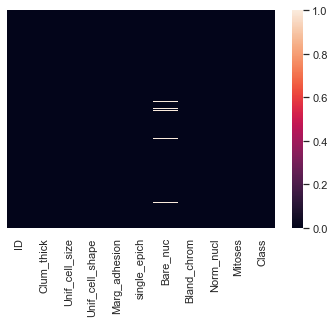

In [22]:
sns.heatmap(df.isnull(), yticklabels=False)

In [23]:
data =df.dropna() # deletes all the rows that contains missing data

In [24]:
data

,ID,Clum_thick,Unif_cell_size,Unif_cell_shape,Marg_adhesion,single_epich,Bare_nuc,Bland_chrom,Norm_nucl,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2.0,1,1,1,2
695,841769,2,1,1,1,2,1.0,1,1,1,2
696,888820,5,10,10,3,7,3.0,8,10,2,4
697,897471,4,8,6,4,3,4.0,10,6,1,4


In [25]:
#drop the unnessery column 
data.drop(['ID'], axis = 1, inplace = True)

C:\Users\lalem\AppData\Local\Temp\ipykernel_13960\1395129501.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(['ID'], axis = 1, inplace = True)


In [26]:
data.head()

,Clum_thick,Unif_cell_size,Unif_cell_shape,Marg_adhesion,single_epich,Bare_nuc,Bland_chrom,Norm_nucl,Mitoses,Class
0,5,1,1,1,2,1.0,3,1,1,2
1,5,4,4,5,7,10.0,3,2,1,2
2,3,1,1,1,2,2.0,3,1,1,2
3,6,8,8,1,3,4.0,3,7,1,2
4,4,1,1,3,2,1.0,3,1,1,2


# 5. Split the data into train and test sets

In [27]:
# data & target --> test cancer 
# cancer dataset
cancerData = data.iloc[:,:-1].values

In [28]:
cancerData

array([[ 5.,  1.,  1., ...,  3.,  1.,  1.],
       [ 5.,  4.,  4., ...,  3.,  2.,  1.],
       [ 3.,  1.,  1., ...,  3.,  1.,  1.],
       ...,
       [ 5., 10., 10., ...,  8., 10.,  2.],
       [ 4.,  8.,  6., ..., 10.,  6.,  1.],
       [ 4.,  8.,  8., ..., 10.,  4.,  1.]])

In [29]:
# target data set 
cancerTarget= data.iloc[:, -1].values

In [30]:
cancerTarget

array([2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 4, 4,
       2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 4, 4, 4, 4, 4, 2,
       4, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 2, 4, 2, 4,
       4, 2, 2, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 2, 4, 2, 4,
       4, 4, 2, 2, 2, 4, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 2, 2, 4, 2,
       2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2,
       4, 4, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 2,
       2, 4, 4, 2, 4, 4, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2,
       2, 4, 4, 2, 2, 2, 4, 4, 2, 4, 4, 4, 2, 2, 4, 2, 2, 4, 4, 4, 4, 2,
       4, 4, 2, 4, 4, 4, 2, 4, 2, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 4, 4, 2,
       2, 4, 2, 4, 4, 4, 2, 2, 2, 2, 4, 4, 4, 4, 4, 2, 4, 4, 4, 2, 4, 2,
       4, 4, 2, 2, 2, 2, 4, 2, 2, 4, 4, 4, 4, 4, 2, 4, 4, 2, 2, 4, 4, 2,
       2, 4, 4, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 2, 4,

In [31]:
#check 
print(len(cancerData))
print(len(cancerTarget))

683
683


train & test split method 

In [32]:
# test 7 data ; traint 676 data 
# index for test --> 50, 150, 250,350,450,550,650
test_idx = [50, 150, 250,350,450,550,650]

In [33]:
test_data = cancerData[[50, 150, 250,350,450,550,650],]

In [34]:
test_data

array([[10.,  3.,  6.,  2.,  3.,  5.,  4., 10.,  2.],
       [ 1.,  1.,  1.,  1.,  2.,  1.,  1.,  1.,  1.],
       [ 3.,  1.,  1.,  1.,  2.,  1.,  3.,  1.,  1.],
       [ 2.,  1.,  1.,  1.,  2.,  1.,  3.,  1.,  1.],
       [10.,  9.,  8.,  7.,  6.,  4.,  7., 10.,  3.],
       [ 5.,  7., 10., 10.,  5., 10., 10., 10.,  1.],
       [ 5.,  2.,  2.,  2.,  2.,  1.,  1.,  1.,  2.]])

In [35]:
test_target= cancerTarget[[50, 150, 250,350,450,550,650],]

In [36]:
test_target

array([4, 2, 2, 2, 4, 4, 2], dtype=int64)

In [37]:
#train data = cancerData - test_inx (rows = 683 - 7 = 676)
#train data 
train_data= np.delete(cancerData,test_idx, axis=0)

In [38]:
len(train_data)

676

In [39]:
train_target= np.delete(cancerTarget,test_idx, axis=0)

In [40]:
len(train_target)

676

# 6. Create a Logistic Regression classifier and train it using your Training data set.

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [42]:
clf=LogisticRegression()
clf.fit(train_data, train_target)

LogisticRegression()

In [43]:
#from sklearn import tree
#clf=tree.DecisionTreeClassifier()

#clf.fit(train_data, train_target)

In [44]:
test_data

array([[10.,  3.,  6.,  2.,  3.,  5.,  4., 10.,  2.],
       [ 1.,  1.,  1.,  1.,  2.,  1.,  1.,  1.,  1.],
       [ 3.,  1.,  1.,  1.,  2.,  1.,  3.,  1.,  1.],
       [ 2.,  1.,  1.,  1.,  2.,  1.,  3.,  1.,  1.],
       [10.,  9.,  8.,  7.,  6.,  4.,  7., 10.,  3.],
       [ 5.,  7., 10., 10.,  5., 10., 10., 10.,  1.],
       [ 5.,  2.,  2.,  2.,  2.,  1.,  1.,  1.,  2.]])

# 7.Make predictions using test data and generate confusion matrix of your results.

In [45]:
test_target

array([4, 2, 2, 2, 4, 4, 2], dtype=int64)

In [46]:
#the moment to see the result
print (clf.predict(test_data))

[4 2 2 2 4 4 2]


the prediction based on test_data == test_target. cheers !

# 8. Generate the confusion matrix and compare the accuracy with the result of previous step.

In [47]:
from sklearn.model_selection import train_test_split
data_train, data_test, target_train, target_test = train_test_split(cancerData , cancerTarget, test_size = 0.35)

In [50]:
from sklearn import tree
my_classifier = tree.DecisionTreeClassifier()
my_classifier.fit(data_train,target_train)

DecisionTreeClassifier()

In [51]:
prediction = my_classifier.predict(data_test)
print(prediction)

[2 4 2 2 4 2 2 2 2 2 4 2 2 2 2 4 2 2 4 2 2 4 2 2 4 4 2 4 2 4 4 2 2 2 4 2 2
 2 2 4 2 4 4 2 4 2 2 4 2 2 4 2 4 4 2 2 2 2 4 2 2 4 2 2 2 2 4 4 2 2 2 2 2 2
 2 2 4 2 4 2 4 2 2 2 4 4 2 4 4 4 2 2 2 2 2 4 4 2 4 2 2 2 2 4 2 4 2 2 2 2 2
 4 2 4 2 2 4 2 2 4 4 4 2 2 4 2 2 4 2 2 4 2 2 2 2 2 2 2 2 2 2 4 2 2 4 4 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 4 2 2 2 2 2 2 4 2 4 4 2 2 2 2 4 4 2 4 2 2 2 2 2
 2 2 2 4 4 4 4 2 2 2 2 4 2 2 2 2 4 4 2 2 4 2 4 4 2 2 4 4 2 2 4 2 4 2 2 2 2
 2 2 2 2 4 4 4 2 2 4 4 4 4 2 4 2 4 2]


In [53]:
#get the accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(target_test , prediction))

0.95


Around 95% accuracy.